<a href="https://colab.research.google.com/github/BabaGeorge22/MAT-421/blob/main/HWB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Homework B2 – George Tome***

Chapters 17.4 – Lagrange Polynomial & 17.5 – Newton’s Polynomial

**Section 17.4**

Lagrange polynomial interpolation finds one single polynomial that goes through all data points. It builds basis polynomials so that each basis is 1 at one data point and 0 at the others.

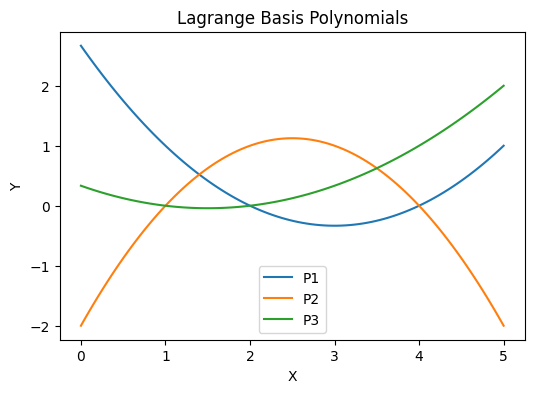

In [3]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Data
x_vals = [1, 2, 4]
y_vals = [2, 3, -1]

# Create 3 Lagrange basis polynomials (P1, P2, P3) manually

# For data at x=1,2,4, the polynomial for the 1st basis could look like:
# P1(x) = ((x - 2)(x - 4)) / ((1 - 2)(1 - 4))
# Similarly for P2, P3.

def basis_poly(x, i, xdata):
    """
    Lagrange basis polynomial for the i-th data point.
    """
    numerator = 1
    denominator = 1
    xi = xdata[i]
    for j, xj in enumerate(xdata):
        if j != i:
            numerator *= (x - xj)
            denominator *= (xi - xj)
    return numerator / denominator

# Evaluate each basis polynomial on a grid
x_grid = np.linspace(0, 5, 100)
P1_vals = [basis_poly(xx, 0, x_vals) for xx in x_grid]
P2_vals = [basis_poly(xx, 1, x_vals) for xx in x_grid]
P3_vals = [basis_poly(xx, 2, x_vals) for xx in x_grid]

# Plot
plt.figure(figsize=(6,4))
plt.plot(x_grid, P1_vals, label='P1')
plt.plot(x_grid, P2_vals, label='P2')
plt.plot(x_grid, P3_vals, label='P3')
plt.title("Lagrange Basis Polynomials")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Define a function basis_poly to compute the i-th Lagrange basis.

Loop over all points except i to form the product.

Plot the three basis polynomials for x from 0 to 5.

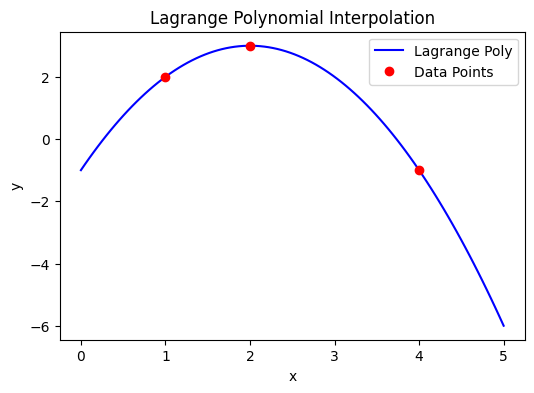

Value at x=3.0 -> 1.9999999999999998


In [4]:
from scipy.interpolate import lagrange

# Same data
x_data = np.array([1, 2, 4])
y_data = np.array([2, 3, -1])

# Build the polynomial using scipy's lagrange
L_poly = lagrange(x_data, y_data)

# Evaluate over a range
x_fine = np.linspace(0, 5, 100)
y_fine = L_poly(x_fine)

# Plot
plt.figure(figsize=(6,4))
plt.plot(x_fine, y_fine, 'b-', label='Lagrange Poly')
plt.plot(x_data, y_data, 'ro', label='Data Points')
plt.title("Lagrange Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# See the polynomial at x=3.0
print("Value at x=3.0 ->", L_poly(3.0))

Use lagrange(x_data, y_data) from scipy to build a single polynomial that passes through our points.

Evaluate it on a fine grid for plotting.

Check the polynomial’s value at x=3.0.

**Section** **17.5**

Newton’s interpolation also creates one polynomial for all data, but it uses divided differences. The first row of the divided differences table gives us the coefficients.

Divided Differences Table:
 [[ 4.         -1.5         1.16666667 -0.4       ]
 [ 1.          2.         -0.83333333  0.        ]
 [ 3.         -0.5         0.          0.        ]
 [ 2.          0.          0.          0.        ]]


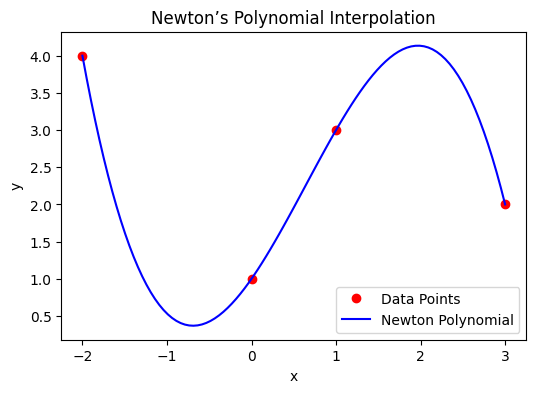

Newton’s polynomial value at x=2 -> 4.133333333333334


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x_pts = np.array([-2, 0, 1, 3])
y_pts = np.array([4, 1, 3, 2])

def divided_differences(x, y):
    """
    Build the divided difference table.
    Returns an array where [0, :] is the first row of coefficients.
    """
    n = len(x)
    table = np.zeros((n, n))
    # First column is the y-values
    table[:, 0] = y

    # Build the table column by column
    for col in range(1, n):
        for row in range(n - col):
            num = table[row+1, col-1] - table[row, col-1]
            den = x[row+col] - x[row]
            table[row, col] = num / den

    return table

def newton_poly_eval(x, x_data, table):
    """
    Evaluate Newton's polynomial at x, using the divided difference table.
    """
    n = len(x_data) - 1
    # The top-left element in the table is the first coefficient
    # table[0, :] is the entire row of coefficients
    coeffs = table[0, :]

    # Start from the last coefficient
    poly_val = coeffs[n]
    for k in range(1, n+1):
        poly_val = coeffs[n-k] + (x - x_data[n-k]) * poly_val
    return poly_val

# Build the table
dd_table = divided_differences(x_pts, y_pts)
print("Divided Differences Table:\n", dd_table)

# Evaluate on a fine range
x_eval = np.linspace(-2, 3, 100)
y_eval = [newton_poly_eval(xx, x_pts, dd_table) for xx in x_eval]

# Plot
plt.figure(figsize=(6,4))
plt.plot(x_pts, y_pts, 'ro', label="Data Points")
plt.plot(x_eval, y_eval, 'b-', label="Newton Polynomial")
plt.title("Newton’s Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Check polynomial at x=2
print("Newton’s polynomial value at x=2 ->", newton_poly_eval(2, x_pts, dd_table))

divided_differences creates a table with divided differences.

newton_poly_eval uses that table to evaluate the polynomial at any x.

Plot the resulting polynomial and check the value at x=2